### Importing needed libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from prophet import Prophet

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


### United States of America

In [2]:
UnitedStatesofAmerica_dataset = pd.read_excel('UnitedStatesofAmerica_Dataset.xlsx')

In [3]:
UnitedStatesofAmerica_dataset.head(20)

,Country or region,Country code,ds,Bioenergy_yhat,Coal_yhat,Gas_yhat,Hydro_yhat,Solar_yhat,Wind_yhat,Emission
0,United States of America,USA,2000-01-01,60.73,1966.27,614.99,270.03,0.49,5.59,532.606
1,United States of America,USA,2001-01-01,49.75,1903.96,639.13,208.14,0.54,6.74,535.533
2,United States of America,USA,2002-01-01,53.71,1933.13,691.01,255.59,0.55,10.35,526.956
3,United States of America,USA,2003-01-01,53.34,1973.74,649.91,267.27,0.53,11.19,532.299
4,United States of America,USA,2004-01-01,53.54,1978.30,710.10,259.93,0.58,14.14,529.099
5,United States of America,USA,2005-01-01,54.28,2012.87,760.96,263.76,0.55,17.81,530.787
6,United States of America,USA,2006-01-01,54.86,1990.51,816.44,282.69,0.51,26.59,522.156
7,United States of America,USA,2007-01-01,55.54,2016.46,896.59,240.61,0.61,34.45,525.213
8,United States of America,USA,2008-01-01,55.03,1985.80,882.98,248.54,0.86,55.36,518.707
9,United States of America,USA,2009-01-01,54.49,1755.90,920.98,268.82,0.89,73.89,496.546


In [4]:
#Remove a column in the dataset
UnitedStatesofAmerica_dataset = UnitedStatesofAmerica_dataset.drop(['Emission'], axis=1)

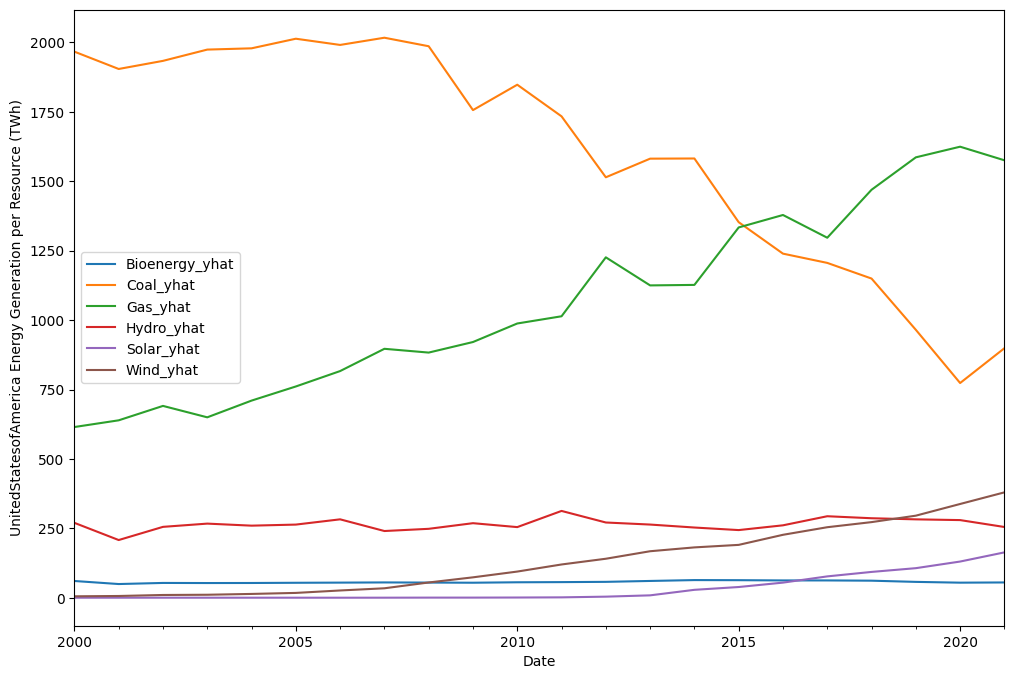

In [5]:
ax = UnitedStatesofAmerica_dataset.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('UnitedStatesofAmerica Energy Generation per Resource (TWh)')
ax.set_xlabel('Date')  
plt.show()

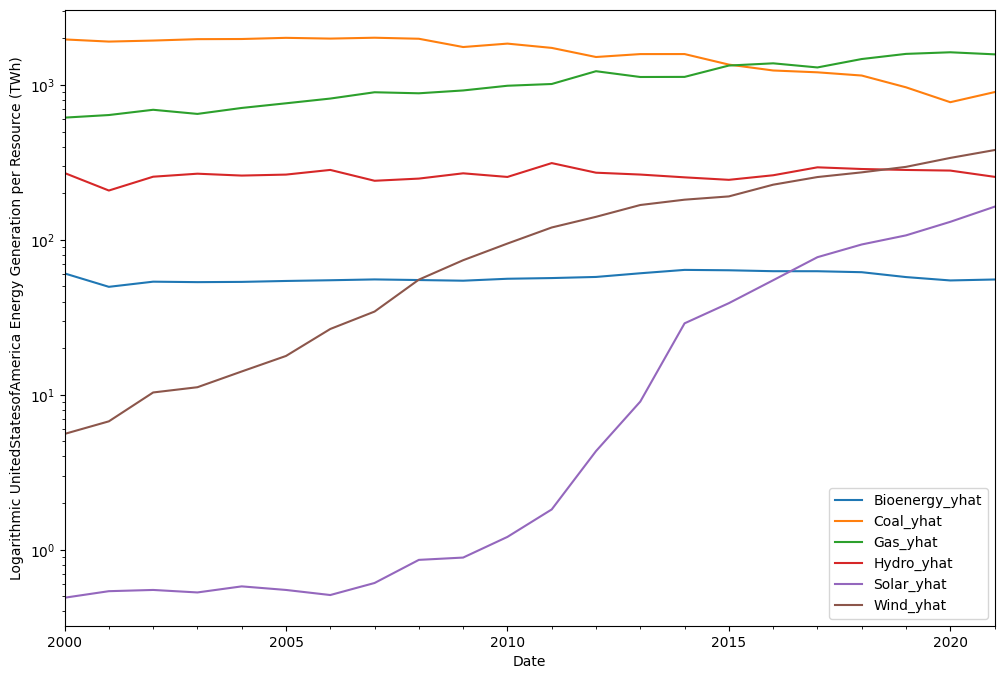

In [6]:
# Make y-axis in log scale
ax = UnitedStatesofAmerica_dataset.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Logarithmic UnitedStatesofAmerica Energy Generation per Resource (TWh)')
ax.set_xlabel('Date')  
ax.set_yscale('log')
plt.show()

#### UnitedStatesofAmerica's bioenergy

In [7]:
UnitedStatesofAmerica_BioenergyModel = Prophet()

##### Model Validation


In [8]:
UnitedStatesofAmerica_BioenergyValidationModel = Prophet()
columns_to_load = ['ds', 'Bioenergy_yhat']
dataset_bioenergy = pd.read_excel('UnitedStatesofAmerica_Dataset.xlsx', usecols=columns_to_load)
dataset_bioenergy = dataset_bioenergy.rename(columns={'ds': 'ds',
                        'Bioenergy_yhat': 'y'})

# Take just the first 15 rows for training
dataset_bioenergy_validation = dataset_bioenergy[:15]
UnitedStatesofAmerica_BioenergyValidationModel.fit(dataset_bioenergy_validation)
future_years_validation = pd.date_range(start='2015', end='2022', freq='Y')
future_validation = pd.DataFrame({'ds': future_years_validation})
forecast_validation = UnitedStatesofAmerica_BioenergyValidationModel.predict(future_validation)

17:49:40 - cmdstanpy - INFO - Chain [1] start processing
17:49:41 - cmdstanpy - INFO - Chain [1] done processing


In [9]:
datasetX = dataset_bioenergy[15:]
forecast_validation = forecast_validation[['ds', 'yhat']]

pred = forecast_validation['yhat']
correc = datasetX['y']
# Calculate the mean square error
error1 = mean_squared_error(correc, pred)
print('Mean Squared Error: %.3f' % error1)

# Calculate the root mean square error
error2 = np.sqrt(mean_squared_error(correc, pred))
print('Root Mean Squared Error: %.3f' % error2)

# Calculate the mean absolute percentage error
error3 = np.mean(np.abs((correc - pred) / correc)) * 100
print('Mean Absolute Percentage Error: %.3f' % error3)

Mean Squared Error: 34.976
Root Mean Squared Error: 5.914
Mean Absolute Percentage Error: nan


#### Model Training


In [10]:
columns_to_load = ['ds', 'Bioenergy_yhat']
dataset_bioenergy = pd.read_excel('UnitedStatesofAmerica_Dataset.xlsx', usecols=columns_to_load)
dataset_bioenergy = dataset_bioenergy.rename(columns={'ds': 'ds',
                        'Bioenergy_yhat': 'y'})
UnitedStatesofAmerica_BioenergyModel.fit(dataset_bioenergy)

17:49:41 - cmdstanpy - INFO - Chain [1] start processing
17:49:41 - cmdstanpy - INFO - Chain [1] done processing


In [11]:
future_years = pd.date_range(start='2022', end='2051', freq='Y')
future = pd.DataFrame({'ds': future_years})
forecast = UnitedStatesofAmerica_BioenergyModel.predict(future)

In [12]:
columns_to_load = ['ds', 'yhat']
forecasted_values =forecast.loc[:, columns_to_load]
forecasted_values = forecasted_values.rename(columns={'ds': 'ds',
                        'yhat': 'y'})   
UnitedStatesofAmerica_Bioenergy = pd.concat([dataset_bioenergy, forecasted_values], ignore_index=True)
UnitedStatesofAmerica_Bioenergy = UnitedStatesofAmerica_Bioenergy.rename(columns={'ds': 'ds', 'y': 'Bioenergy_yhat'})
UnitedStatesofAmerica_Bioenergy.head(51)

,ds,Bioenergy_yhat
0,2000-01-01,60.730000
1,2001-01-01,49.750000
2,2002-01-01,53.710000
3,2003-01-01,53.340000
4,2004-01-01,53.540000
5,2005-01-01,54.280000
6,2006-01-01,54.860000
7,2007-01-01,55.540000
8,2008-01-01,55.030000
9,2009-01-01,54.490000


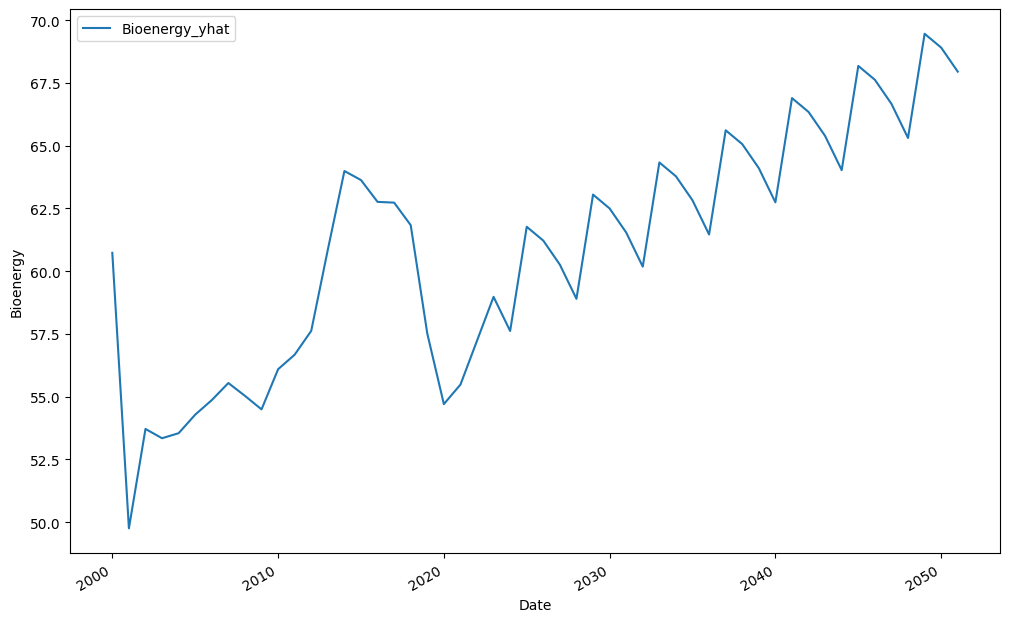

In [13]:
ax = UnitedStatesofAmerica_Bioenergy.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Bioenergy')
ax.set_xlabel('Date')
plt.show()

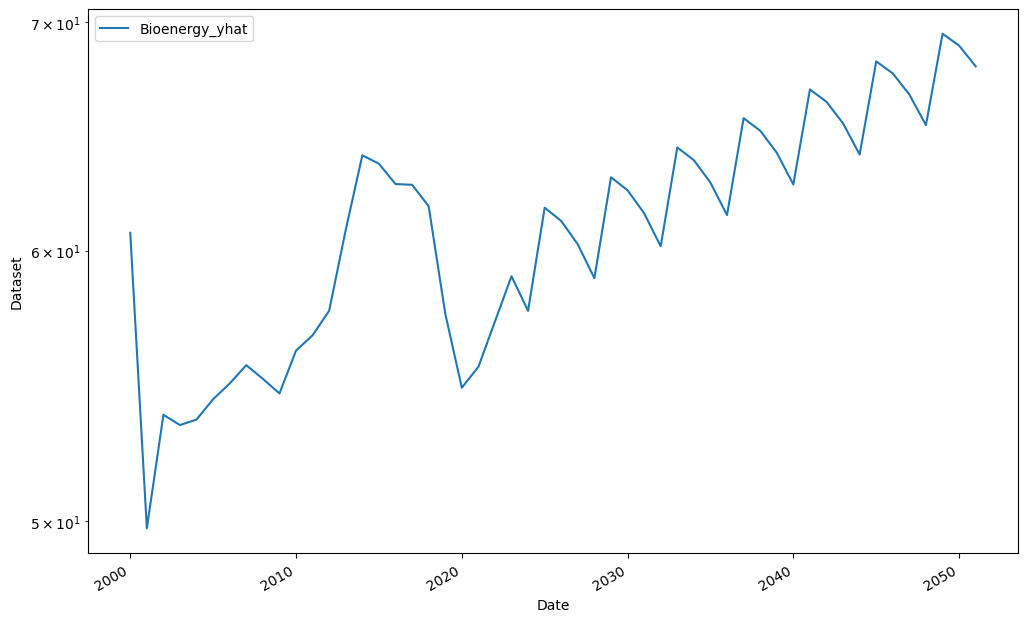

In [14]:
# Make y-axis in log scale
ax = UnitedStatesofAmerica_Bioenergy.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Dataset')
ax.set_xlabel('Date')  
ax.set_yscale('log')
plt.show()

#### UnitedStatesofAmerica Coal Model

In [15]:
UnitedStatesofAmerica_CoalModel = Prophet()

UnitedStatesofAmerica_CoalValidationModel = Prophet()
columns_to_load = ['ds', 'Coal_yhat']
dataset_Coal = pd.read_excel('UnitedStatesofAmerica_Dataset.xlsx', usecols=columns_to_load)
dataset_Coal = dataset_Coal.rename(columns={'ds': 'ds',
                        'Coal_yhat': 'y'})

# Take just the first 15 rows for training
dataset_CoalValidation = dataset_Coal[:15]
UnitedStatesofAmerica_CoalValidationModel.fit(dataset_CoalValidation)
Coal_future_years_validation = pd.date_range(start='2015', end='2022', freq='Y')
Coal_future_validation = pd.DataFrame({'ds': Coal_future_years_validation})
Coal_forecast_validation = UnitedStatesofAmerica_CoalValidationModel.predict(Coal_future_validation)

CoaldatasetX = dataset_Coal[15:]
Coal_forecast_validation = Coal_forecast_validation[['ds', 'yhat']]

CoalPred = Coal_forecast_validation['yhat']
CoalCorrec = CoaldatasetX['y']
# Calculate the mean square error
error1 = mean_squared_error(CoalCorrec, CoalPred)
print('Mean Squared Error: %.3f' % error1)

# Calculate the root mean square error
error2 = np.sqrt(mean_squared_error(CoalCorrec, CoalPred))
print('Root Mean Squared Error: %.3f' % error2)

# Calculate the mean absolute percentage error
error3 = np.mean(np.abs((CoalCorrec - CoalPred) / CoalCorrec)) * 100
print('Mean Absolute Percentage Error: %.3f' % error3)

17:49:44 - cmdstanpy - INFO - Chain [1] start processing
17:49:44 - cmdstanpy - INFO - Chain [1] done processing


Mean Squared Error: 39294.485
Root Mean Squared Error: 198.228
Mean Absolute Percentage Error: nan


In [16]:
columns_to_load = ['ds', 'Coal_yhat']
dataset_Coal = pd.read_excel('UnitedStatesofAmerica_Dataset.xlsx', usecols=columns_to_load)
dataset_Coal = dataset_Coal.rename(columns={'ds': 'ds',
                        'Coal_yhat': 'y'})
UnitedStatesofAmerica_CoalModel.fit(dataset_Coal)

CoalFuture_years = pd.date_range(start='2022', end='2051', freq='Y')
CoalFuture = pd.DataFrame({'ds': CoalFuture_years})
CoalForecast = UnitedStatesofAmerica_CoalModel.predict(CoalFuture)
columns_to_load = ['ds', 'yhat']
CoalForecasted_values = CoalForecast.loc[:, columns_to_load]
CoalForecasted_values = CoalForecasted_values.rename(columns={'ds': 'ds',
                        'yhat': 'y'})   
UnitedStatesofAmerica_Coal = pd.concat([dataset_Coal, CoalForecasted_values], ignore_index=True)
UnitedStatesofAmerica_Coal = UnitedStatesofAmerica_Coal.rename(columns={'ds': 'ds', 'y': 'Coal_yhat'})


17:49:44 - cmdstanpy - INFO - Chain [1] start processing
17:49:45 - cmdstanpy - INFO - Chain [1] done processing


In [17]:


UnitedStatesofAmerica_Coal.head(51)

,ds,Coal_yhat
0,2000-01-01,1966.270000
1,2001-01-01,1903.960000
2,2002-01-01,1933.130000
3,2003-01-01,1973.740000
4,2004-01-01,1978.300000
5,2005-01-01,2012.870000
6,2006-01-01,1990.510000
7,2007-01-01,2016.460000
8,2008-01-01,1985.800000
9,2009-01-01,1755.900000


#### UnitedStatesofAmerica Gas 


In [18]:
UnitedStatesofAmerica_GasModel = Prophet()

UnitedStatesofAmerica_GasValidationModel = Prophet()
columns_to_load = ['ds', 'Gas_yhat']
dataset_Gas = pd.read_excel('UnitedStatesofAmerica_Dataset.xlsx', usecols=columns_to_load)
dataset_Gas = dataset_Gas.rename(columns={'ds': 'ds',
                        'Gas_yhat': 'y'})

# Take just the first 15 rows for training
dataset_GasValidation = dataset_Gas[:15]
UnitedStatesofAmerica_GasValidationModel.fit(dataset_GasValidation)
Gas_future_years_validation = pd.date_range(start='2015', end='2022', freq='Y')
Gas_future_validation = pd.DataFrame({'ds': Gas_future_years_validation})
Gas_forecast_validation = UnitedStatesofAmerica_GasValidationModel.predict(Gas_future_validation)

GasdatasetX = dataset_Gas[15:]
Gas_forecast_validation = Gas_forecast_validation[['ds', 'yhat']]

GasPred = Gas_forecast_validation['yhat']
GasCorrec = GasdatasetX['y']
# Calculate the mean square error
error1 = mean_squared_error(GasCorrec, GasPred)
print('Mean Squared Error: %.3f' % error1)

# Calculate the root mean square error
error2 = np.sqrt(mean_squared_error(GasCorrec, GasPred))
print('Root Mean Squared Error: %.3f' % error2)

# Calculate the mean absolute percentage error
error3 = np.mean(np.abs((GasCorrec - GasPred) / GasCorrec)) * 100
print('Mean Absolute Percentage Error: %.3f' % error3)

17:49:46 - cmdstanpy - INFO - Chain [1] start processing
17:49:46 - cmdstanpy - INFO - Chain [1] done processing


Mean Squared Error: 8965.912
Root Mean Squared Error: 94.688
Mean Absolute Percentage Error: nan


In [19]:
columns_to_load = ['ds', 'Gas_yhat']
dataset_Gas = pd.read_excel('UnitedStatesofAmerica_Dataset.xlsx', usecols=columns_to_load)
dataset_Gas = dataset_Gas.rename(columns={'ds': 'ds',
                        'Gas_yhat': 'y'})
UnitedStatesofAmerica_GasModel.fit(dataset_Gas)

GasFuture_years = pd.date_range(start='2022', end='2051', freq='Y')
GasFuture = pd.DataFrame({'ds': GasFuture_years})
GasForecast = UnitedStatesofAmerica_GasModel.predict(GasFuture)
columns_to_load = ['ds', 'yhat']
GasForecasted_values = GasForecast.loc[:, columns_to_load]
GasForecasted_values = GasForecasted_values.rename(columns={'ds': 'ds',
                        'yhat': 'y'})   
UnitedStatesofAmerica_Gas = pd.concat([dataset_Gas, GasForecasted_values], ignore_index=True)
UnitedStatesofAmerica_Gas = UnitedStatesofAmerica_Gas.rename(columns={'ds': 'ds', 'y': 'Gas_yhat'})

17:49:46 - cmdstanpy - INFO - Chain [1] start processing
17:49:47 - cmdstanpy - INFO - Chain [1] done processing


In [20]:
UnitedStatesofAmerica_Gas.head(51)

,ds,Gas_yhat
0,2000-01-01,614.990000
1,2001-01-01,639.130000
2,2002-01-01,691.010000
3,2003-01-01,649.910000
4,2004-01-01,710.100000
5,2005-01-01,760.960000
6,2006-01-01,816.440000
7,2007-01-01,896.590000
8,2008-01-01,882.980000
9,2009-01-01,920.980000


#### UnitedStatesofAmerica Hydro

In [21]:
UnitedStatesofAmerica_HydroModel = Prophet()

UnitedStatesofAmerica_HydroValidationModel = Prophet()
columns_to_load = ['ds', 'Hydro_yhat']
dataset_Hydro = pd.read_excel('UnitedStatesofAmerica_Dataset.xlsx', usecols=columns_to_load)
dataset_Hydro = dataset_Hydro.rename(columns={'ds': 'ds',
                        'Hydro_yhat': 'y'})

# Take just the first 15 rows for training
dataset_HydroValidation = dataset_Hydro[:15]
UnitedStatesofAmerica_HydroValidationModel.fit(dataset_HydroValidation)
Hydro_future_years_validation = pd.date_range(start='2015', end='2022', freq='Y')
Hydro_future_validation = pd.DataFrame({'ds': Hydro_future_years_validation})
Hydro_forecast_validation = UnitedStatesofAmerica_HydroValidationModel.predict(Hydro_future_validation)

HydrodatasetX = dataset_Hydro[15:]
Hydro_forecast_validation = Hydro_forecast_validation[['ds', 'yhat']]

HydroPred = Hydro_forecast_validation['yhat']
HydroCorrec = HydrodatasetX['y']
# Calculate the mean square error
error1 = mean_squared_error(HydroCorrec, HydroPred)
print('Mean Squared Error: %.3f' % error1)

# Calculate the root mean square error
error2 = np.sqrt(mean_squared_error(HydroCorrec, HydroPred))
print('Root Mean Squared Error: %.3f' % error2)

# Calculate the mean absolute percentage error
error3 = np.mean(np.abs((HydroCorrec - HydroPred) / HydroCorrec)) * 100
print('Mean Absolute Percentage Error: %.3f' % error3)

17:49:48 - cmdstanpy - INFO - Chain [1] start processing
17:49:48 - cmdstanpy - INFO - Chain [1] done processing


Mean Squared Error: 405.273
Root Mean Squared Error: 20.131
Mean Absolute Percentage Error: nan


In [22]:
columns_to_load = ['ds', 'Hydro_yhat']
dataset_Hydro = pd.read_excel('UnitedStatesofAmerica_Dataset.xlsx', usecols=columns_to_load)
dataset_Hydro = dataset_Hydro.rename(columns={'ds': 'ds',
                        'Hydro_yhat': 'y'})
UnitedStatesofAmerica_HydroModel.fit(dataset_Hydro)

HydroFuture_years = pd.date_range(start='2022', end='2051', freq='Y')
HydroFuture = pd.DataFrame({'ds': HydroFuture_years})
HydroForecast = UnitedStatesofAmerica_HydroModel.predict(HydroFuture)
columns_to_load = ['ds', 'yhat']
HydroForecasted_values = HydroForecast.loc[:, columns_to_load]
HydroForecasted_values = HydroForecasted_values.rename(columns={'ds': 'ds',
                        'yhat': 'y'})   
UnitedStatesofAmerica_Hydro = pd.concat([dataset_Hydro, HydroForecasted_values], ignore_index=True)
UnitedStatesofAmerica_Hydro = UnitedStatesofAmerica_Hydro.rename(columns={'ds': 'ds', 'y': 'Hydro_yhat'})

17:49:48 - cmdstanpy - INFO - Chain [1] start processing
17:49:49 - cmdstanpy - INFO - Chain [1] done processing


In [23]:
UnitedStatesofAmerica_Hydro.head(51)

,ds,Hydro_yhat
0,2000-01-01,270.030000
1,2001-01-01,208.140000
2,2002-01-01,255.590000
3,2003-01-01,267.270000
4,2004-01-01,259.930000
5,2005-01-01,263.760000
6,2006-01-01,282.690000
7,2007-01-01,240.610000
8,2008-01-01,248.540000
9,2009-01-01,268.820000


#### UnitedStatesofAmerica Solar

In [24]:
UnitedStatesofAmerica_SolarModel = Prophet()

UnitedStatesofAmerica_SolarValidationModel = Prophet()
columns_to_load = ['ds', 'Solar_yhat']
dataset_Solar = pd.read_excel('UnitedStatesofAmerica_Dataset.xlsx', usecols=columns_to_load)
dataset_Solar = dataset_Solar.rename(columns={'ds': 'ds',
                        'Solar_yhat': 'y'})

# Take just the first 15 rows for training
dataset_SolarValidation = dataset_Solar[:15]
UnitedStatesofAmerica_SolarValidationModel.fit(dataset_SolarValidation)
Solar_future_years_validation = pd.date_range(start='2015', end='2022', freq='Y')
Solar_future_validation = pd.DataFrame({'ds': Solar_future_years_validation})
Solar_forecast_validation = UnitedStatesofAmerica_SolarValidationModel.predict(Solar_future_validation)

SolardatasetX = dataset_Solar[15:]
Solar_forecast_validation = Solar_forecast_validation[['ds', 'yhat']]

SolarPred = Solar_forecast_validation['yhat']
SolarCorrec = SolardatasetX['y']
# Calculate the mean square error
error1 = mean_squared_error(SolarCorrec, SolarPred)
print('Mean Squared Error: %.3f' % error1)

# Calculate the root mean square error
error2 = np.sqrt(mean_squared_error(SolarCorrec, SolarPred))
print('Root Mean Squared Error: %.3f' % error2)

# Calculate the mean absolute percentage error
error3 = np.mean(np.abs((SolarCorrec - SolarPred) / SolarCorrec)) * 100
print('Mean Absolute Percentage Error: %.3f' % error3)

17:49:49 - cmdstanpy - INFO - Chain [1] start processing
17:49:50 - cmdstanpy - INFO - Chain [1] done processing


Mean Squared Error: 8292.159
Root Mean Squared Error: 91.061
Mean Absolute Percentage Error: nan


In [25]:
columns_to_load = ['ds', 'Solar_yhat']
dataset_Solar = pd.read_excel('UnitedStatesofAmerica_Dataset.xlsx', usecols=columns_to_load)
dataset_Solar = dataset_Solar.rename(columns={'ds': 'ds',
                        'Solar_yhat': 'y'})
UnitedStatesofAmerica_SolarModel.fit(dataset_Solar)

SolarFuture_years = pd.date_range(start='2022', end='2051', freq='Y')
SolarFuture = pd.DataFrame({'ds': SolarFuture_years})
SolarForecast = UnitedStatesofAmerica_SolarModel.predict(SolarFuture)
columns_to_load = ['ds', 'yhat']
SolarForecasted_values = SolarForecast.loc[:, columns_to_load]
SolarForecasted_values = SolarForecasted_values.rename(columns={'ds': 'ds',
                        'yhat': 'y'})   
UnitedStatesofAmerica_Solar = pd.concat([dataset_Solar, SolarForecasted_values], ignore_index=True)
UnitedStatesofAmerica_Solar = UnitedStatesofAmerica_Solar.rename(columns={'ds': 'ds', 'y': 'Solar_yhat'})

17:49:50 - cmdstanpy - INFO - Chain [1] start processing
17:49:50 - cmdstanpy - INFO - Chain [1] done processing


In [26]:
UnitedStatesofAmerica_Solar.head(51)

,ds,Solar_yhat
0,2000-01-01,0.490000
1,2001-01-01,0.540000
2,2002-01-01,0.550000
3,2003-01-01,0.530000
4,2004-01-01,0.580000
5,2005-01-01,0.550000
6,2006-01-01,0.510000
7,2007-01-01,0.610000
8,2008-01-01,0.860000
9,2009-01-01,0.890000


#### UnitedStatesofAmerica Wind

In [27]:
UnitedStatesofAmerica_WindModel = Prophet()

UnitedStatesofAmerica_WindValidationModel = Prophet()
columns_to_load = ['ds', 'Wind_yhat']
dataset_Wind = pd.read_excel('UnitedStatesofAmerica_Dataset.xlsx', usecols=columns_to_load)
dataset_Wind = dataset_Wind.rename(columns={'ds': 'ds',
                        'Wind_yhat': 'y'})

# Take just the first 15 rows for training
dataset_WindValidation = dataset_Wind[:15]
UnitedStatesofAmerica_WindValidationModel.fit(dataset_WindValidation)
Wind_future_years_validation = pd.date_range(start='2015', end='2022', freq='Y')
Wind_future_validation = pd.DataFrame({'ds': Wind_future_years_validation})
Wind_forecast_validation = UnitedStatesofAmerica_WindValidationModel.predict(Wind_future_validation)

WinddatasetX = dataset_Wind[15:]
Wind_forecast_validation = Wind_forecast_validation[['ds', 'yhat']]

WindPred = Wind_forecast_validation['yhat']
WindCorrec = WinddatasetX['y']
# Calculate the mean square error
error1 = mean_squared_error(WindCorrec, WindPred)
print('Mean Squared Error: %.3f' % error1)

# Calculate the root mean square error
error2 = np.sqrt(mean_squared_error(WindCorrec, WindPred))
print('Root Mean Squared Error: %.3f' % error2)

# Calculate the mean absolute percentage error
error3 = np.mean(np.abs((WindCorrec - WindPred) / WindCorrec)) * 100
print('Mean Absolute Percentage Error: %.3f' % error3)

17:49:51 - cmdstanpy - INFO - Chain [1] start processing
17:49:51 - cmdstanpy - INFO - Chain [1] done processing


Mean Squared Error: 4391.383
Root Mean Squared Error: 66.268
Mean Absolute Percentage Error: nan


In [28]:
columns_to_load = ['ds', 'Wind_yhat']
dataset_Wind = pd.read_excel('UnitedStatesofAmerica_Dataset.xlsx', usecols=columns_to_load)
dataset_Wind = dataset_Wind.rename(columns={'ds': 'ds',
                        'Wind_yhat': 'y'})
UnitedStatesofAmerica_WindModel.fit(dataset_Wind)

WindFuture_years = pd.date_range(start='2022', end='2051', freq='Y')
WindFuture = pd.DataFrame({'ds': WindFuture_years})
WindForecast = UnitedStatesofAmerica_WindModel.predict(WindFuture)
columns_to_load = ['ds', 'yhat']
WindForecasted_values = WindForecast.loc[:, columns_to_load]
WindForecasted_values = WindForecasted_values.rename(columns={'ds': 'ds',
                        'yhat': 'y'})   
UnitedStatesofAmerica_Wind = pd.concat([dataset_Wind, WindForecasted_values], ignore_index=True)
UnitedStatesofAmerica_Wind = UnitedStatesofAmerica_Wind.rename(columns={'ds': 'ds', 'y': 'Wind_yhat'})

17:49:52 - cmdstanpy - INFO - Chain [1] start processing
17:49:52 - cmdstanpy - INFO - Chain [1] done processing


In [29]:
UnitedStatesofAmerica_Wind.head(51)

,ds,Wind_yhat
0,2000-01-01,5.590000
1,2001-01-01,6.740000
2,2002-01-01,10.350000
3,2003-01-01,11.190000
4,2004-01-01,14.140000
5,2005-01-01,17.810000
6,2006-01-01,26.590000
7,2007-01-01,34.450000
8,2008-01-01,55.360000
9,2009-01-01,73.890000


In [30]:
FullUnitedStatesofAmericaData = pd.merge(UnitedStatesofAmerica_Bioenergy, UnitedStatesofAmerica_Coal, on='ds')
FullUnitedStatesofAmericaData = pd.merge(FullUnitedStatesofAmericaData, UnitedStatesofAmerica_Gas, on='ds')
FullUnitedStatesofAmericaData = pd.merge(FullUnitedStatesofAmericaData, UnitedStatesofAmerica_Hydro, on='ds')
FullUnitedStatesofAmericaData = pd.merge(FullUnitedStatesofAmericaData, UnitedStatesofAmerica_Solar, on='ds')
FullUnitedStatesofAmericaData = pd.merge(FullUnitedStatesofAmericaData, UnitedStatesofAmerica_Wind, on='ds')
FullUnitedStatesofAmericaData.rename(columns={'ds': 'ds', 'Bioenergy_yhat': 'Bioenergy', 'Coal_yhat': 'Coal', 'Gas_yhat': 'Gas', 'Hydro_yhat': 'Hydro', 'Solar_yhat': 'Solar', 'Wind_yhat': 'Wind'}, inplace=True)
FullUnitedStatesofAmericaData.head(51)

,ds,Bioenergy,Coal,Gas,Hydro,Solar,Wind
0,2000-01-01,60.730000,1966.270000,614.990000,270.030000,0.490000,5.590000
1,2001-01-01,49.750000,1903.960000,639.130000,208.140000,0.540000,6.740000
2,2002-01-01,53.710000,1933.130000,691.010000,255.590000,0.550000,10.350000
3,2003-01-01,53.340000,1973.740000,649.910000,267.270000,0.530000,11.190000
4,2004-01-01,53.540000,1978.300000,710.100000,259.930000,0.580000,14.140000
5,2005-01-01,54.280000,2012.870000,760.960000,263.760000,0.550000,17.810000
6,2006-01-01,54.860000,1990.510000,816.440000,282.690000,0.510000,26.590000
7,2007-01-01,55.540000,2016.460000,896.590000,240.610000,0.610000,34.450000
8,2008-01-01,55.030000,1985.800000,882.980000,248.540000,0.860000,55.360000
9,2009-01-01,54.490000,1755.900000,920.980000,268.820000,0.890000,73.890000


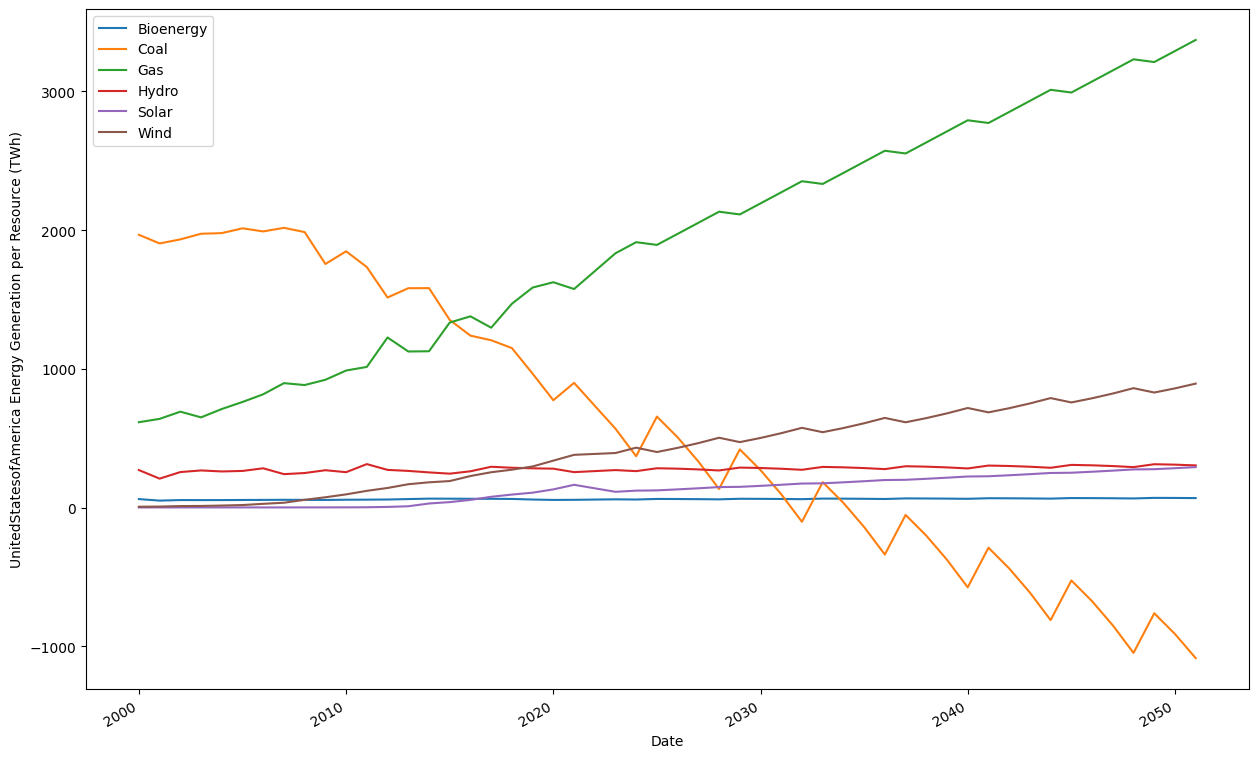

In [31]:
UnitedStatesofAmericaPlot = FullUnitedStatesofAmericaData.set_index('ds').plot(figsize=(15, 10))
UnitedStatesofAmericaPlot.set_ylabel('UnitedStatesofAmerica Energy Generation per Resource (TWh)')
UnitedStatesofAmericaPlot.set_xlabel('Date')  
plt.show()

In [32]:
UnitedStatesofAmerica_file_name = 'Predicted_UnitedStatesofAmerica_Dataset.xlsx'
FullUnitedStatesofAmericaData.to_excel(UnitedStatesofAmerica_file_name, index=False)